In [1]:
import xarray as xa

INPUT_FILE = '../data/delivery/super_resolution_sample.nc'

# Weather Forecast Downscaling Challenge

The object of this challenge is to improve the resolution of weather forecasts using machine learning.
We provide the *super_resolution.nc* file which contains the output from two weather models.
The */train/x* and */val/x* groups contain output from the RDPS weather model. This model has a low resolution.
The */train/y* and */val/y* groups contain output from the CALDAS assimilation model. It has a higher resolution.
The objective is to predict the CALDAS model using data from the RDPS model.

We took the liberty of interpolating the input data to the same grid as the output data.
This means that the input and output arrays have the same shape, even though the resolution of the input data is visibly lower.

Such a model is useful because, once it is trained, it is less expensive to compute than the high resolution model.
Thus, we can could make high resolution forecasts for longer time frames.

In the earth sciences community, downscaling refers to making the grid points smaller, i.e. increase the resolution.
In the computer vision community, the analogous task is called super resolution.


This challenge is proposed by Bertrand Denis (formerly of Environment and Climate Change Canada) and David Landry ([Centre de recherche en informatique de Montréal](https://www.crim.ca/fr/a-propos/#carriere)).

## Getting the data

A small sample of the data is available here: http://132.217.140.130/climate/super_resolution_sample.nc
The full dataset (around 25GB) is available here: http://132.217.140.130/climate/super_resolution.nc
We withheld a test dataset for evaluation purposes.
The test dataset represents dates that came after the ones found in the training and validation sets.

## Data sample

In [2]:
sample_x = xa.open_dataset(INPUT_FILE, group='/train/x')

We provide 15 variables that we expect can be helpful for super resolution.
These variables are defined as:

- mg_delta: Difference between rdps and caldas for the variable MG (Water/land mask)
- me_delta: Difference between rdps and caldas for the variable ME (Mean Elevation of Topography)
- zp_delta: Difference between rdps and caldas for the variable ZP (Roughness length (CRESSMAN))
- vg_delta: Difference between rdps and caldas for the variable VG (Dominant vegetation type)
- td: Dew point temperature
- tt: Air temperature
- pn: Sea level pressure
- nt: Total cloud cover
- h: Height of boundary layer
- rt: Total precipitation rate
- i4: Water in the snow pack
- 5p: Fraction of grid covered by snow
- i6: Albedo of snow
- uu: U-component of the wind (along the X-axis of the grid)
- vv: V-component of the wind (along the Y-axis of the grid)


Note that the target variable is *tt*.

In [3]:
sample_x

<xarray.Dataset>
Dimensions:   (time: 20, x: 256, y: 256)
Coordinates:
  * time      (time) datetime64[ns] 2016-10-01 ... 2016-10-03T09:00:00
Dimensions without coordinates: x, y
Data variables:
    mg_delta  (time, x, y) float32 ...
    me_delta  (time, x, y) float32 ...
    zp_delta  (time, x, y) float32 ...
    vg_delta  (time, x, y) float32 ...
    td        (time, x, y) float32 ...
    tt        (time, x, y) float32 ...
    pn        (time, x, y) float32 ...
    nt        (time, x, y) float32 ...
    h         (time, x, y) float32 ...
    rt        (time, x, y) float32 ...
    i4        (time, x, y) float32 ...
    5p        (time, x, y) float32 ...
    i6        (time, x, y) float32 ...
    uu        (time, x, y) float32 ...
    vv        (time, x, y) float32 ...

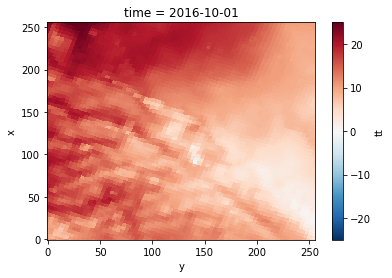

In [4]:
sample_x.tt[0].plot()

In [5]:
sample_x.time

<xarray.DataArray 'time' (time: 20)>
array(['2016-10-01T00:00:00.000000000', '2016-10-01T03:00:00.000000000',
       '2016-10-01T06:00:00.000000000', '2016-10-01T09:00:00.000000000',
       '2016-10-01T12:00:00.000000000', '2016-10-01T15:00:00.000000000',
       '2016-10-01T18:00:00.000000000', '2016-10-01T21:00:00.000000000',
       '2016-10-02T00:00:00.000000000', '2016-10-02T03:00:00.000000000',
       '2016-10-02T06:00:00.000000000', '2016-10-02T09:00:00.000000000',
       '2016-10-02T12:00:00.000000000', '2016-10-02T15:00:00.000000000',
       '2016-10-02T18:00:00.000000000', '2016-10-02T21:00:00.000000000',
       '2016-10-03T00:00:00.000000000', '2016-10-03T03:00:00.000000000',
       '2016-10-03T06:00:00.000000000', '2016-10-03T09:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2016-10-01 ... 2016-10-03T09:00:00

In [6]:
sample_x.close()

In [7]:
sample_y = xa.open_dataset(INPUT_FILE, group='/train/y')

In [8]:
sample_y

<xarray.Dataset>
Dimensions:  (time: 20, x: 256, y: 256)
Coordinates:
  * time     (time) datetime64[ns] 2016-10-01 ... 2016-10-03T09:00:00
Dimensions without coordinates: x, y
Data variables:
    tt       (time, x, y) float32 ...

In [9]:
sample_y.time

<xarray.DataArray 'time' (time: 20)>
array(['2016-10-01T00:00:00.000000000', '2016-10-01T03:00:00.000000000',
       '2016-10-01T06:00:00.000000000', '2016-10-01T09:00:00.000000000',
       '2016-10-01T12:00:00.000000000', '2016-10-01T15:00:00.000000000',
       '2016-10-01T18:00:00.000000000', '2016-10-01T21:00:00.000000000',
       '2016-10-02T00:00:00.000000000', '2016-10-02T03:00:00.000000000',
       '2016-10-02T06:00:00.000000000', '2016-10-02T09:00:00.000000000',
       '2016-10-02T12:00:00.000000000', '2016-10-02T15:00:00.000000000',
       '2016-10-02T18:00:00.000000000', '2016-10-02T21:00:00.000000000',
       '2016-10-03T00:00:00.000000000', '2016-10-03T03:00:00.000000000',
       '2016-10-03T06:00:00.000000000', '2016-10-03T09:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2016-10-01 ... 2016-10-03T09:00:00

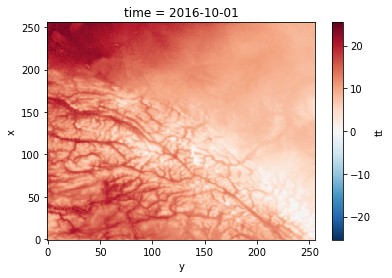

In [10]:
sample_y.tt[0].plot() # This represents the target data.

## Getting the data out of xarray

In [11]:
import numpy as np

In [12]:
d = xa.open_dataset(INPUT_FILE, group='/train/x') 

In [16]:
kept_vars = d.drop_vars(['time', 'h', 'mg_delta', 'me_delta', 'zp_delta', 'vg_delta', 'td', 'pn', 'nt', 'rt', 'i4', '5p', 'i6'])

In [17]:
kept_vars

<xarray.Dataset>
Dimensions:  (time: 20, x: 256, y: 256)
Dimensions without coordinates: time, x, y
Data variables:
    tt       (time, x, y) float32 ...
    uu       (time, x, y) float32 ...
    vv       (time, x, y) float32 ...

In [18]:
x = np.array(kept_vars.to_array())

In [19]:
x = x.transpose(1, 2, 3, 0)

In [20]:
x.shape

(20, 256, 256, 3)

In [21]:
d.close()

## Baseline model: linear interpolation

Since the data is already interpolated on the same grid, we get a baseline model for free!

In [22]:
import torch

In [23]:
with xa.open_dataset(INPUT_FILE, group='/train/x') as d:
    input_tt = torch.from_numpy(np.array(d.tt))

In [24]:
with xa.open_dataset(INPUT_FILE, group='/train/y') as d:
    output_tt = torch.from_numpy(np.array(d.tt))

In [25]:
input_tt.shape

torch.Size([20, 256, 256])

In [26]:
output_tt.shape

torch.Size([20, 256, 256])

In [27]:
rmse = torch.sqrt(torch.square(output_tt - input_tt).mean())

In [28]:
rmse

tensor(2.0821)

## Packaging your forecast (ndarray -> xarray)

In [38]:
model_predictions = np.array(output_tt)

with xa.open_dataset(INPUT_FILE, group='/train/y') as d:
    out_dataset = xa.Dataset(data_vars={
        'tt': (['time', 'x', 'y'], model_predictions)
    }, coords={
        'time': d.time
    })
    
    

In [36]:
out_dataset

<xarray.Dataset>
Dimensions:  (time: 20, x: 256, y: 256)
Coordinates:
  * time     (time) datetime64[ns] 2016-10-01 ... 2016-10-03T09:00:00
Dimensions without coordinates: x, y
Data variables:
    tt       (time, x, y) float32 9.934 10.24 10.23 10.03 ... 3.302 3.354 4.025

In [37]:
out_dataset.to_netcdf('output_file.nc', mode='w', group='/test/y_hat')